<hr style="color:orange">

# <span style="color:blue"> <center> **Proyecto 1:** 
## <center> <span style="color:blue"> Predicción de Diabetes Meidante Modelos de Clasificación

### <center><span style="color:blue"> Eduardo Alberto Domínguez Fontes

### Objetivo general: Hacer una comparación de los diferentes modelos de machine learning para resolver un problema de clasificación desde el enfoque de aprendizaje supervisado.

### Objetivos específicos: 
- Seleccionar el mejor modelo de machine learning para elaborar predicciones de diabetes en mujeres jovenes.
- Aplicar diferentes métricas de desempeño para hacer la comparación.
- Implementar las técnicas de calibración de hiperparámetros y de validación cruzada.

<hr style="color:orange">

In [1]:
# Importamos las librerías a utilizar
import pandas as pd     # Lectura y manipulación de DataFrames
import numpy as np      # Operaciones matemáticas 

# Librerías de SciKit Learn
from sklearn.linear_model import LogisticRegression    # Modelos de clasificación 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.impute import KNNImputer   # Para la imputación de datos faltantes

from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV  # Validación cruzada y rejilla de busqueda
from sklearn.model_selection import RandomizedSearchCV      # Busqueda por rejilla aleatoria
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler      # Para el reescalamiento de los datos
from sklearn.impute import SimpleImputer, KNNImputer                            # Para la imputación de datos faltantes
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Librerías para gráficas
import matplotlib.pyplot as plt
import seaborn as sns

Considerando los registros históricos del hospital que se encuentran en el archivo diabetes.csv los cuales incluyen la siguiente información:

a ) Pregnancies: El número de embarazos de la paciente.

b) Glucose: Niveles de glucosa en la sangre

c) BloodPressure: Medida de la presión sanguínea

d ) SkinThickness: Grosor de la piel

e ) Insulin: Nivel de insulina en la sangre.

f ) BMI: Indice de masa corporal

g ) DiabetesPedigree Function: Medida de riego de diabetes en función de antecedentes familiares

h ) Age: Edad

i ) Outcome: Diagnóstico final -> 1 si la paciente es diabética y 0 si no lo es.

In [2]:
# Leemos los datos
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
1,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
2,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
3,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
4,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
...,...,...,...,...,...,...,...,...,...
763,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
764,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
765,3,123.0,100.0,35.0,240.0,57.3,0.880,22,0
766,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1


Vemos que la base de datos se compone de 8 atributos, 1 variable de respuesta (Outcome) y 768 registros.

<hr style="color:blue">

# <center> <span style="color:blue"> Análisis Exploratorio y Descriptivo de los Datos
<hr style="color:blue">

In [3]:
# Realizamos un análisis de datos faltantes y verificamos el tipo de dato:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
# Verificamos de manera más clara los datos faltantes:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Como podemos ver, los atributos SkinThickness e Insuline son los que tienen mas datos faltantes, además, hay que tomar en cuenta que también puede haber datos codificados los cuales podemos identificar al realizar un análisis descriptivo más profundo de las variables numéricas tomando en cuenta los datos faltantes al momento de analizar los valores estadísticos.

Además, debido a que la variable de respuesta (target) es de tipo numérica que solo toma valores de 0 o 1  se tiene un problema de clasificación.

NOTA: El target no tiene datos faltantes, esto es importante, ya que de tener datos faltantes, los registros asociados a estos deben ser eliminados completamente.

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Descripción estadística de los atributos numéricos
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A partir de la descripción estadística de los atributos numéricos podemos analizar de una mejor manera la distribución que presentan estos datos, e incluso saber si hay valores codificados.

Podemos ver la media de cada atributo, desviación estándar, los cuartiles que dividen en porcentajes a los datos, la media y valores mínimos y máximos de los atributos numéricos. Por lo tanto a partir de esto podemos comenzar a hacer inferencias de cuál de los atributos puede tener mas valores atípicos (Outlayers) a partir del rango intercuartílico (IQR), sin embargo, para analizar esto de mejor manera podemos crear gráficas de caja (o de bigote), en las cuales se muestra de manera más simple la distribución de los datos, a excepción de la variable de respuesta Outcome cuyos valores numéricos son de tipo clasificatorio:

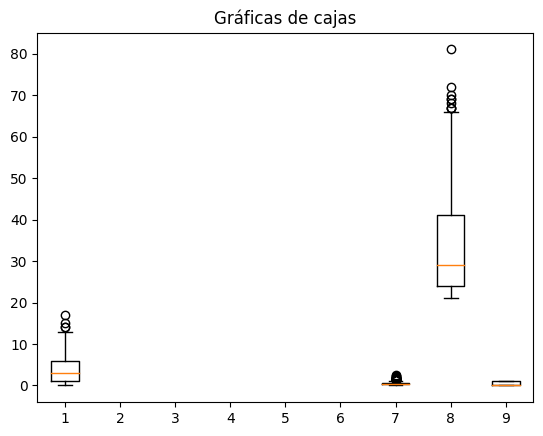

In [7]:
# Representación gráfica de los atributos numéricos para sus cuartiles, esto es, para visualizar la distribución de los datos.
plt.boxplot(data)
plt.title("Gráficas de cajas")
plt.show()

Como podemos ver en la gráfica, unicamente se muestran las cajas de 3 atributos (El último es la variable de respuesta), esto es debido a que los demás atributos tienen datos faltantes, por lo que no se puede generar un gráfico estadístico.

Podemos también estudiar las correlaciones entre los atributos, es decir, ver que tan relacionados se encuentran a partir del valor de correlación de Pearson.

El coeficiente de correlación de Pearson toma valores de -1 a 1, indicando la relación lineal que existe entre estas.

<Axes: >

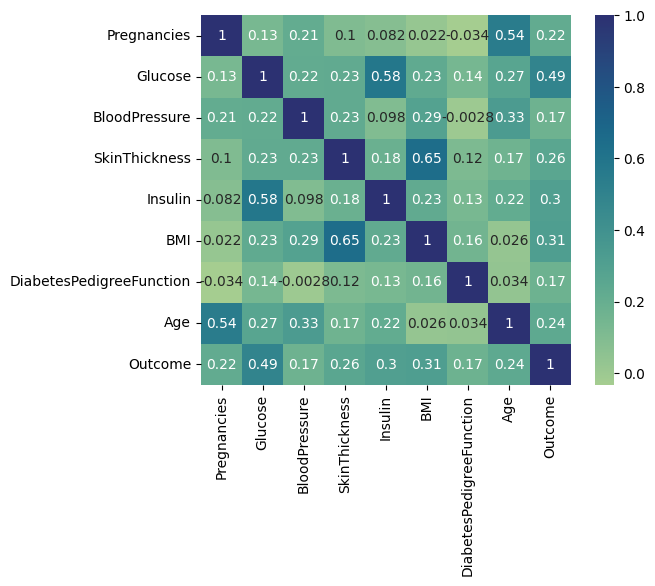

In [8]:
# Calculamos la correlación
matriz_corr=data.corr(method="pearson")

# Graficamos:
sns.heatmap(matriz_corr,square=True,cmap="crest",annot=True)

Ya que tenemos esto en mente, podemos solucionar el problema con la imputación de datos faltantes, cuando entrenemos los modelos. Para ello, primero debemos separar la variable de respuesta de los atributos:

In [9]:
# Seleccionamos los atributos y el target
Y=data.Outcome
del data["Outcome"]
X=data

Ya con los datos separados, podemos realizar un conteo de las categorías de la variable de respuesta, y  a partir de esto saber si existe algún desbalance en las categorías. Esto es necesario para que el modelo no se ajuste mas a una categoría (que no memorice las respuestas).

In [10]:
Y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Para medir el desempeño predictivo, es necesario contar con los datos completos, para ello podemos seguir una serie de pasos:

1.- Dividir el conjunto de datos en entrenamiento y prueba.

2.- Completar los datos faltantes en el conjunto de entrenamiento.

3.- Entrenar el modelo.

4.- Completar datos faltantes en el conjunto de prueba aplicando la estrategia aprendida en el conjunto de entrenamiento.

5.- Hacemos las predicciones

6.- Medir el desempeño predictivo del modelo

<hr style="color:blue">

# <center> <span style="color:blue"> Regresión Logística

<hr span style="color:blue">

La regresión logística analiza la relación entre una variable dependiente de respuesta binarizada (0 o 1) con las variables independientes (atributos), entregando una probabilidad para la variable dependiente de ser clasificada con alguno de los valores binarizados, para esto, la regresión, utiliza la función sigmoidea (logística), la cual transforma los valores de los atributos en valores de 0 a 1 para poder tomarlos como probabilidades y para ello, se buscan los valores de los coeficientes que minimicen el error de clasificación.

En este modelo podemos hacer uso de algunos hiperparámetros que nos permitirán obtener un mejor desempeño predictivo del modelo:
 - solver: Algoritmo a utilizar en el proceso de optimización para encontrar los coeficientes que minimizan la función de pérdida, los mas utilizados son "lbfgs" para regresión de multiclase, "liblinear" para técnica de descenso de gradiente, "newton-cg", "sag" y "saga".

 - class_weight: Este parámetro hace una ponderación en la importancia de los pesos asignados a los valores de la clasificación cuando los datos en la variable de respuesta presentan un desbalance. Para ello, el parámetro puede tomar distintos valores, los más comunes son: "balanced" que calcula los pesos de las clases inversamente proporcionales a su frecuencia (Numero de casos negativos / Numero de casos positivos), así, para la clase minoritaria se tienen pesos mayores y pesos menores para la clase mayoritaria. También se puede utilizar "uniform" que asigna un peso uniforme a todas las clases.

 Pero debemos tener en cuenta que antes de entrenar el modelo, debemos estandarizar los datos a una misma escala de medición, esto se puede hacer con un reescalamiento "StandardScaler" (los datos tendrán media 0 y desviación estándar 1) o "MinMaxScaler" (a partir del valor mínimo y máximo reescala los datos a un rango entre [0,1]). Además. también se debe corregir el problema de los datos faltantes, eso se soluciona realizando una imputación de datos con "SimpleImputer", en el cual podemos definir la estrategia de imputación, es decir, como llenar los datos faltantes a través de los datos que si tienen valores en el mismo atributo, puede ser con la media, mediana, u otro valor que nosotros ingresemos manualmente.

 Para calificar el modelo, podemos hacer uso de distintas métricas de desempeño:

 - accuracy: Mide la proporción de mediciones correctas en el modelo (Se usa principalmente cuando los datos muestran un equilibrio de clases).

 - precision: Mide la proporción de predicciones positivas que son realmente positivas.

 - recall: Aquí tenemos dos opciones, la sensibilidad y la especificidad. La sensibilidad mide la proporción de casos positivos que el modelo identifica correctamente (verdaderos positivos). La especificidad mide la proporción de casos negativos que el modelo identifica correctamente (verdaderos negativos).

 - f1: El F1-score es la media armónica de la precisión y la sensibilidad.

 - roc_auc: El área bajo la curva ROC mide la capacidad del modelo para distinguir entre clases positivas y negativas en función de un umbral de decisión.

 Para poder entender mejor algunas de las métricas de desempeño es útil una matriz de confusión, en la cuál se muestra el número de casos verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos del modelo. Esta matriz de confusión describe de manera gráfica dichos valores.  

 Aplicando los pasos y los haciendo uso de los parámetros definidos, podemos calificar el desempeño predictivo de un modelo de Regresión Logística:

In [11]:
# Definimos la sentencia de pasos para entrenar el modelo a travez de un pipeline:
# Imputamos los datos faltantes, reescalamos y aplicamos el modelo 
Pipe_RLog=make_pipeline(SimpleImputer(strategy="mean"), StandardScaler(), LogisticRegression(solver="liblinear",class_weight="balanced"))

# Definimos el esquema de validación cruzada, el cuál calcula 50 métricas de desempeño:
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)

# Clasificamos el desempeño del modelo de a cuerdo a una métrica:
scores=cross_val_score(Pipe_RLog,X,Y,scoring="accuracy",cv=cv,n_jobs=-1)
print(f"La exactitud promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_RLog,X,Y,scoring="precision",cv=cv,n_jobs=-1)
print(f"La precisión promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_RLog,X,Y,scoring="recall",cv=cv,n_jobs=-1)
print(f"La sensibilidad promedio: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_RLog,X,Y,scoring="f1",cv=cv,n_jobs=-1)
print(f"El F1-score promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_RLog,X,Y,scoring="roc_auc",cv=cv,n_jobs=-1)
print(f"El área bajo la curva ROC promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

La exactitud promedio es: 0.7573 +- 0.0450
La precisión promedio es: 0.6319 +- 0.0866
La sensibilidad promedio: 0.7201 +- 0.0760
El F1-score promedio es: 0.6706 +- 0.0724
El área bajo la curva ROC promedio es: 0.8376 +- 0.0440


Los valores de las métricas de desempeño con StandardScaler son: 

 - <span style="color:green"> La exactitud promedio es: 0.7573 +- 0.0450
 - <span style="color:green"> La precisión promedio es: 0.6319 +- 0.0866
 - <span style="color:green"> La sensibilidad promedio: 0.7201 +- 0.0760
 - <span style="color:green">El F1-score promedio es: 0.6706 +- 0.0724
 - <span style="color:green">El área bajo la curva ROC promedio es: 0.8376 +- 0.0440

Los valores de las métricas con MinMaxScaler son:

 -   <span style="color:green"> La exactitud promedio es: 0.7568 +- 0.0457
 -   <span style="color:green"> La precisión promedio es: 0.6290 +- 0.0897
 -   <span style="color:green"> La sensibilidad promedio: 0.7292 +- 0.0775
 -   <span style="color:green">El F1-score promedio es: 0.6727 +- 0.0747
 -   <span style="color:green">   El área bajo la curva ROC promedio es: 0.8380 +- 0.0442

Ya que tenemos el valor de las métricas, podemos entrenar el modelo en el conjunto de datos de entrenamiento y ver su comportamiento, ya que el modelo esté entrenado, podemos observar el desempeño predictivo en el conjunto de datos de entrenamiento a partir de un reporte de clasificación, el cuál nos muestra los resultados de algunas métricas de desempeño mencionadas anteriormente.

In [12]:
# Aplicar el preprocesamiento de los datos, porque están incompletos:

# Definimos la estrategia para completar los datos faltantes y estandarizar los datos:
Pipe1=make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

# Aplicamos las estrategias
X_std=Pipe1.fit_transform(X)

# Definimos y entrenamos el modelo
Modelo_RLog=LogisticRegression(solver="liblinear", class_weight="balanced")
Modelo_RLog.fit(X_std,Y)

# Reporte de clasificación:
Y_pred_rlog=Modelo_RLog.predict(X_std)
print(classification_report(Y,Y_pred_rlog))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       500
           1       0.65      0.74      0.69       268

    accuracy                           0.77       768
   macro avg       0.75      0.76      0.76       768
weighted avg       0.78      0.77      0.77       768



Podemos ver que el reporte nos entrega métricas de desempeño en el conjunto de entrenamiento:

- <span style="color:green"> accuracy: El modelo predice correctamente al 77% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 65%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 85%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 74%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 79%.  

A partir del reporte de clasificación podemos ver los valores de las métricas de desempeño en el conjunto de datos de entrenamiento, que por lo regular estas métricas son muy optimistas, por lo que nos deberíamos basar más en las que calculamos a partir de la validación cruzada. NOTA: Hay que tener esto en cuenta para todos los modelos posteriores.

Ya que tenemos las predicciones de las clasificaciones, podemos crear la matriz de confusión:

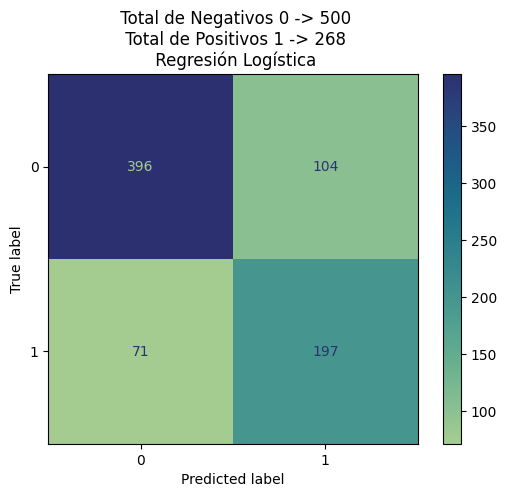

In [13]:
# Matriz de confusión
matriz=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_rlog))
matriz.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 Regresión Logística""")
plt.show()

De la matriz de confusión tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 396 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 104 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 71 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 197 pacientes que eran diabéticos. 


<hr style="color:blue">

# <center> <span style="color:blue"> Regresión Logística Regularizada

<hr span style="color:blue">

Ahora utilizaremos una regularización sobre la regresión logística anterior, es decir, se agrega un hiperparámetro de regularización "C", esto nos ayuda a controlar el sobreajuste y a mejorar el desempeño predictivo del modelo.

Este parámetro es la inversa de la fuerza de regularización , de manera que al tener un valor bajo, el modelo se ajustará menos a los datos de entrenamiento, pero generalizará mejor para datos nuevos, mientras que para valores altos de c, el modelo se ajusta más a los datos de entrenamiento, pudiendo llevar al sobreajuste.

Calculamos la métrica de desempeño con distintos valores de C:

In [14]:
valores_C=[0.000001,0.000001,0.00001,0.0001,0.001,0.01,0.1]
for i in valores_C:
    # Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline:
    Pipe_RLog_reg=make_pipeline(SimpleImputer(strategy="median"),StandardScaler(),LogisticRegression(C=i,solver="liblinear",class_weight="balanced"))

    # Definimos el esquema de validación cruzada, el cuál calcula 50 métricas de desempeño:
    cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)
    
    # Clasificamos el desempeño del modelo de a cuerdo a una métrica, utilizando validación cruzada
    scores=cross_val_score(Pipe_RLog_reg,X,Y,scoring="recall",cv=cv,n_jobs=-1)
    print(f"Para C={i}")
    print(f"Sensibilidad promedio: {scores.mean():.4f} +- {scores.std():.4f}\n")

Para C=1e-06
Sensibilidad promedio: 0.7908 +- 0.0755

Para C=1e-06
Sensibilidad promedio: 0.7908 +- 0.0755

Para C=1e-05
Sensibilidad promedio: 0.7908 +- 0.0755

Para C=0.0001
Sensibilidad promedio: 0.7892 +- 0.0769

Para C=0.001
Sensibilidad promedio: 0.7778 +- 0.0833

Para C=0.01
Sensibilidad promedio: 0.7322 +- 0.0763

Para C=0.1
Sensibilidad promedio: 0.7198 +- 0.0718



Nos damos cuenta que a medida que C disminuye aumenta la sensibilidad y de que a partir de un valor de C=1e-05 la sensibilidad ya no cambia, entonces podems usar este valor para ajustar un modelo con todos los datos y ver su comportamiento:

In [15]:
# Aplicamos el preprocesamiento de los datos, porque están incompletos

# Definimos la estrategia para completar los datos faltantes y estandarizar los datos (ya completos):
Pipe2=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

# Aplicamos las estrategias
X_std_2=Pipe2.fit_transform(X)

# Definimos y entrenamos el modelo
Modelo_RLog_reg=LogisticRegression(C=1e-05,solver="liblinear", class_weight="balanced")
Modelo_RLog_reg.fit(X_std_2,Y)

# Hacemos las predicciones (En el conjunto de prueba) y graficamos la matriz de confusión:
Y_pred_rlog_reg=Modelo_RLog_reg.predict(X_std_2)

# Imprimimos el reporte de clasificación:
print(classification_report(Y,Y_pred_rlog_reg))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77       500
           1       0.58      0.79      0.67       268

    accuracy                           0.73       768
   macro avg       0.72      0.74      0.72       768
weighted avg       0.76      0.73      0.73       768



A partir del reporte de clasificación tenemos lo siguiente:

- <span style="color:green"> accuracy: El modelo predice correctamente al 73% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 58%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 86%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 79%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 69%.  


Ya que tenemos las predicciones de las clasificaciones y los valores de las métricas, podemos crear la matriz de confusión:

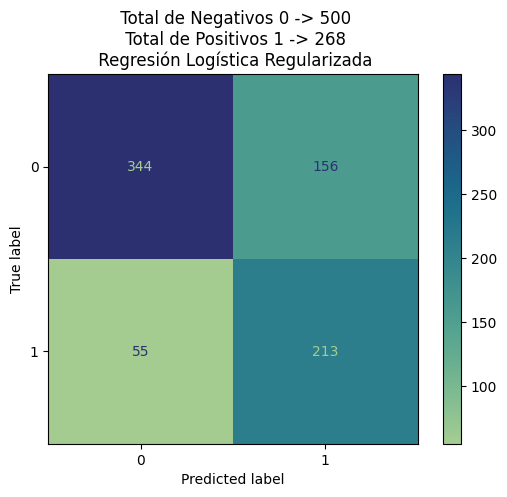

In [16]:
# Matriz de confusión
matriz2=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_rlog_reg))
matriz2.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 Regresión Logística Regularizada""")
plt.show()

De la matriz de confusión del modelo regularizado tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 344 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 156 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 55 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 213 pacientes que eran diabéticos. 

 Podemos ver que este modelo clasifica menos verdaderos negativos y más verdaderos positivos que el modelo anterior no regularizado.

## <span style="color:blue"> Interpretación de los Coeficientes

Los coeficientes estimados representan la relación entre las variables predictoras (atributos) y la variable de respuesta (target), dichos coeficientes se expresan en términos de logaritmos de razones de probabilidades (log odds ratio).

Para poder obtener entonces una interpretación de estos se debe seguir una serie de pasos:
 - Identificar los coeficientes de interés.

 - Exponenciar los coeficientes, esto se hace para obtener la razón de probabilidades (odds ratio) para cada coeficiente.

 - Interpretación del odds ratio, este indica cuanto más probable es que ocurra el evento de interés cuando la variable predictora aumenta en una unidad. Un odds ratio de 1 significa que la variable predictora no tiene efecto sobre el evento, mientras que un odds ratio mayor a 1 significa que la variable predictora aumenta la probabilidad de que ocurra el evento de interés, y para el odds ratio menor a 1 indica que la variable predictora disminuye la probabilidad de que ocurra el evento de interés.

Creamos un Dataframe en el cual estarán guardados los valores de los coeficientes de cada variable (log odds ratio) y también los coeficientes exponenciados (odds ratio), pero debemos tener en cuenta que los datos no deben estar reescalados, por lo tanto, volvemos a entrenar el modelo sin realizar este preprocesamiento:

In [17]:
# Aplicamos el preprocesamiento de los datos, porque están incompletos

# Definimos la estrategia para completar los datos faltantes y estandarizar los datos (ya completos):
Pipe3=make_pipeline(SimpleImputer(strategy="median"))

# Aplicamos las estrategias
X_std_3=Pipe3.fit_transform(X)

# Definimos y entrenamos el modelo
Modelo_RLog_reg_f=LogisticRegression(C=1e-05,solver="liblinear", class_weight="balanced")
Modelo_RLog_reg_f.fit(X_std_3,Y)

# Creamos el dataframe, y además creamos los valores de Odds ratio.
tabla=pd.DataFrame()
tabla["Variables"]=data.columns
tabla["Coeficientes"]=Modelo_RLog_reg_f.coef_[0].round(4)    # Devuelve los coeficientes del modelo de regresión log (log odds ratio).
tabla["Odds Ratio"]=np.exp(tabla["Coeficientes"])            # Aplicamos la exponencial a los coeficientes para obtener el odds ratio (odds ratio).
tabla

,Variables,Coeficientes,Odds Ratio
0,Pregnancies,0.0017,1.001701
1,Glucose,0.0080,1.008032
2,BloodPressure,-0.0119,0.988171
3,SkinThickness,-0.0016,0.998401
4,Insulin,0.0007,1.000700
5,BMI,-0.0015,0.998501
6,DiabetesPedigreeFunction,0.0001,1.000100
7,Age,0.0003,1.000300


A partir de los coeficientes vemos que estos pueden tomar valores positivos o negativos, 

Si en un paciente los niveles de insulina aumentan 100 unidades, entonces el riesgo de ser diagnosticado como diabético es ahora 1.0006 * 100 veces mayor

## <span style="color:blue"> Selección de los atributos para un submodelo

Ya que hemos medido las métricas de desempeño y calculado los valores de los odds ratio para el modelo de regresión logística, podemos tener entonces una idea de cuales atributos son los que mas contribuyen y cuales los que menos contribuyen para lograr un correcto ajuste, por lo tanto podemos ahora realizar una selección de estos para poder reducir el modelo, y a partir del principio de parsimonia lograr el mejor ajuste con un modelo más simple.

Para esto utilizaremos la técnica "SelectKBest", la cual realiza una selección de las mejores características del conjunto de datos a través de la evaluación de la relación entre cada atributo y la variable de respuesta. Para lograrlo puede utilizar distintas funciones o pruebas estadísticas com chi-cuadrado o prueba F. 

In [18]:
# Verificamos la cantidad de atributos y los nombres de estos en el conjunto de datos.
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [19]:
# Importamos la técnica de selección de los mejores atributos
from sklearn.feature_selection import SelectKBest

X_best=SelectKBest(k=5).fit(X_std,Y)    # Selecciona los 5 mejores atributos
seleccionados=X_best.get_feature_names_out(X.columns)
print(seleccionados)

['Pregnancies' 'Glucose' 'SkinThickness' 'BMI' 'Age']


La técnica seleccionó los 5 mejores atributos para el modelo, por lo tanto, haremos uso de estos y veremos si logra realizar las predicciones de una mejor manera o no.

Para ello, primero debemos eliminar aquellos atributos no seleccionados:

In [20]:
# Eliminamos los atributos
X_KBest=X[seleccionados]
X_KBest

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,2,74.0,NaN,NaN,22
1,3,80.0,NaN,NaN,22
2,2,84.0,NaN,NaN,21
3,0,94.0,NaN,NaN,25
4,7,105.0,NaN,NaN,24
...,...,...,...,...,...
763,0,162.0,56.0,53.2,25
764,1,88.0,42.0,55.0,26
765,3,123.0,35.0,57.3,22
766,0,180.0,63.0,59.4,25


Ya que tenemos los atributos necesarios, podemos calibrar los hiperparámetros del modelo mediante una búsqueda por rejilla:

In [21]:
#Calibramos el modelo mediante una busqueda por rejilla
espacio_param_Rlog={"simpleimputer__strategy":["median","mean"],
                   "logisticregression__C":[0.000001,0.000001,0.00001,0.0001,0.001,0.01,0.1]}

# Definimos la secuencia de pasos mediante un pipeline:
Pipe_RLog_KBest=make_pipeline(SimpleImputer(),StandardScaler(),LogisticRegression(solver="liblinear",class_weight="balanced"))

# Rejilla de búsqueda
Rejilla_KBest=GridSearchCV(Pipe_RLog_KBest,param_grid=espacio_param_Rlog,scoring="recall",cv=cv,n_jobs=-1)
Rejilla_KBest.fit(X_KBest,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_KBest.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_KBest.best_score_}")

Mejor calibración de los hiperparámetros: {'logisticregression__C': 1e-06, 'simpleimputer__strategy': 'median'}
Mejor valor de las métricas: 0.7965109243912839


Podemos ver que con esta configuración encontrada, la sensibilidad logra aumentar un poco en comparación con el modelo anterior.

Con estos valores de hiperparámetros calculados, entrenamos el modelo y vemos las predicciones en la matriz de confusión:

In [22]:
# Definimos la sentencia de pasos para entrenar el modelo a travez de un pipeline:
# Imputamos los datos faltantes, reescalamos y aplicamos el modelo 
Pipe_seleccionados=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

# Aplicamos las estrategias
X_KBest_std=Pipe_seleccionados.fit_transform(X_KBest)

# Definimos y entrenamos el modelo
Modelo_seleccionados=LogisticRegression(C=1e-6,solver="liblinear", class_weight="balanced")
Modelo_seleccionados.fit(X_KBest_std,Y)

# Hacemos las predicciones (En el conjunto de prueba) y graficamos la matriz de confusión:
Y_pred_seleccionados=Modelo_seleccionados.predict(X_KBest_std)

# Reporte de clasificación:
print(classification_report(Y,Y_pred_seleccionados))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76       500
           1       0.58      0.79      0.67       268

    accuracy                           0.72       768
   macro avg       0.72      0.74      0.72       768
weighted avg       0.76      0.72      0.73       768



A partir del reporte de clasificación tenemos lo siguiente:

- <span style="color:green"> accuracy: El modelo predice correctamente al 72% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 58%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 86%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 79%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 69%.  

Como podemos ver, en comparación con el modelo de regresión logística regularizada que utiliza todos los atributos se obtienen prácticamente los mismos valores de las métricas, por lo tanto esos atributos seleccionados cumplen con el principio de parsimonia.
  
Ya que tenemos las predicciones de las clasificaciones y los valores de las métricas, podemos crear la matriz de confusión:

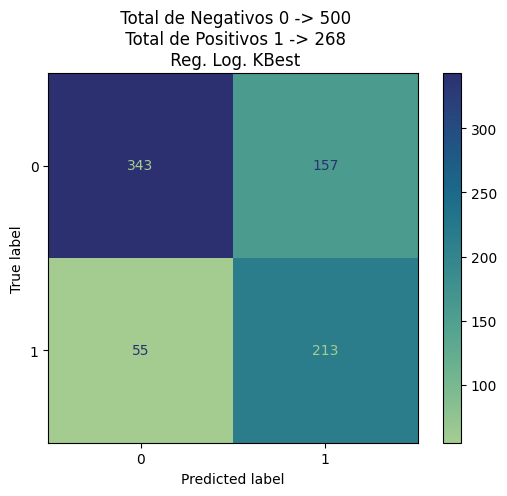

In [23]:
# Matriz de confusión
Matriz_seleccionados=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_seleccionados))
Matriz_seleccionados.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 Reg. Log. KBest""")
plt.show()

De la matriz de confusión del modelo regularizado tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 344 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 157 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 55 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 213 pacientes que eran diabéticos. 

La diferencia con el modelo anterior es prácticamente cero, por lo tanto podemos decir que ambos modelos hacen a misma predicción, con la sutil diferencia que este último es mas simple al utilizar menos atributos. 

<hr style="color:blue">

# <center> <span style="color:blue"> Maquinas de Vector Soporte (SVM)

<hr span style="color:blue">

Las maquinas de vector soporte buscan encontrar un hiperplano el cual logre separar a los datos en las distintas clases de estos, es decir, dejar de un lado del plano datos que pertenezcan a una misma categoría o clase, y del otro lado del plano los datos pertenecientes a la otra categoría o clase. Para lograr este hiperplano separador, el modelo busca crear una "carretera" dicho de manera simple, la cual está compuesta por el hiperplano separador en el centro y a los extremos se encuentran los límites o fronteras, los cuales se denominan "vectores de soporte", estos se generan a partir de los datos más cercanos al hiperplano de ambas clases, generando así un "margen", con base en este margen podemos saber que tan bueno es el modelo para generalizar en datos nuevos. Por lo tanto lo que se busca es maximizar el margen (buscar la carretera mas ancha) para el hiperplano que clasifique correctamente a los datos.

Debemos tener en cuenta que este tipo de modelo es sensible a la escala de los datos ya que trabaja con distancias, por lo tanto es importante convertir todos los datos con una técnica de escalamiento y además imputar los datos faltantes. En este caso se utiliza una técnica de imputación "KnnImputer" la cual se basa en los vecinos más cercanos.

Considerando primero al conjunto de datos como linealmente separable (Con algunos outlayers), el modelo acepta varias configuraciones de hiperparámetros que podemos controlar para ver el comportamiento como penalización, kernel o los pesos de las observaciones. Agregamos una penalización "C" , lo cuál nos lleva a una clasificación de margen suave, es decir, se introducen variables de holgura las cuales permiten que una observación se encuentre dentro del margen o del lado equivocado de la clasificación, por lo tanto, valores muy pequeños de C llevan a un margen más grande pero también a un mayor número de violaciones del margen (outlayers), y para valores grandes de C se tiene un margen mas pequeño con menos violaciones de este.

Tomando esto en consideración, ya que sabemos que los datos se encuentran desbalanceados, agregamos también una ponderación a estos y una función de perdida "hinge" la cual se minimiza a través del ajuste de pesos y sesgos de los datos:
 

In [24]:
# Definimos la sentencia de pasos para entrenar el modelo a través de un pipeline:
# Imputamos los datos faltantes, reescalamos y aplicamos el modelo 
PipeSVM=make_pipeline(KNNImputer(n_neighbors=10),StandardScaler(),LinearSVC(C=1,loss="hinge",class_weight="balanced"))

# Definimos el esquema de validación cruzada, el cuál calcula 50 métricas de desempeño:
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)

# Clasificamos el desempeño del modelo de a cuerdo a una métrica:
scores=cross_val_score(PipeSVM,X,Y,scoring="accuracy",cv=cv,n_jobs=-1)
print(f"La exactitud promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(PipeSVM,X,Y,scoring="precision",cv=cv,n_jobs=-1)
print(f"La precisión promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(PipeSVM,X,Y,scoring="recall",cv=cv,n_jobs=-1)
print(f"La sensibilidad promedio: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(PipeSVM,X,Y,scoring="f1",cv=cv,n_jobs=-1)
print(f"El F1-score promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(PipeSVM,X,Y,scoring="roc_auc",cv=cv,n_jobs=-1)
print(f"El área bajo la curva ROC promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

La exactitud promedio es: 0.7565 +- 0.0445
La precisión promedio es: 0.6336 +- 0.0852
La sensibilidad promedio: 0.7140 +- 0.0757
El F1-score promedio es: 0.6689 +- 0.0694
El área bajo la curva ROC promedio es: 0.8364 +- 0.0441


Ahora que tenemos las métricas de desempeño, podemos calibrar el modelo para encontrar la mejor configuración de los hiperparámetros:

In [25]:
#Calibramos el modelo mediante una busqueda por rejilla
espacio_param_SVM={"knnimputer__n_neighbors":np.arange(1,10,1),
                   "linearsvc__C":[0.000001,0.000001,0.00001,0.0001,0.001,0.01,0.1]}

# Rejilla de busqueda
Rejilla_SVM=GridSearchCV(PipeSVM,param_grid=espacio_param_SVM,scoring="recall",cv=cv,n_jobs=-1)
Rejilla_SVM.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_SVM.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_SVM.best_score_}")

Mejor calibración de los hiperparámetros: {'knnimputer__n_neighbors': 4, 'linearsvc__C': 1e-06}
Mejor valor de las métricas: 0.8008000239713824


Vemos que el valor de C es menor de la lista, al igual que en el modelo anterior puede suceder que a partir de un cierto valor de C la sensibilidad se mantenga.

Ya que tenemos la mejor configuración de hiperparámetros podemos pasar a entrenar el modelo con todos los datos:

In [26]:
# Definimos la sentencia de pasos para entrenar el modelo a travez de un pipeline:
# Imputamos los datos faltantes, reescalamos y aplicamos el modelo 
Pipe4=make_pipeline(KNNImputer(n_neighbors=4),StandardScaler())

# Aplicamos las estrategias
X_std_SVM=Pipe4.fit_transform(X)

# Definimos y entrenamos el modelo
Modelo_SMV=LinearSVC(C=1e-6,loss="hinge", class_weight="balanced")
Modelo_SMV.fit(X_std_SVM,Y)

# Hacemos las predicciones (En el conjunto de prueba) y graficamos la matriz de confusión:
Y_pred_SVM=Modelo_SMV.predict(X_std_SVM)

# Reporte de clasificación:
print(classification_report(Y,Y_pred_SVM))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76       500
           1       0.58      0.81      0.67       268

    accuracy                           0.73       768
   macro avg       0.72      0.74      0.72       768
weighted avg       0.77      0.73      0.73       768



A partir del reporte de clasificación tenemos lo siguiente:

- <span style="color:green"> accuracy: El modelo predice correctamente al 73% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 58%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 87%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 81%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 68%.  


Ya que tenemos las predicciones de las clasificaciones y los valores de las métricas, podemos crear la matriz de confusión:

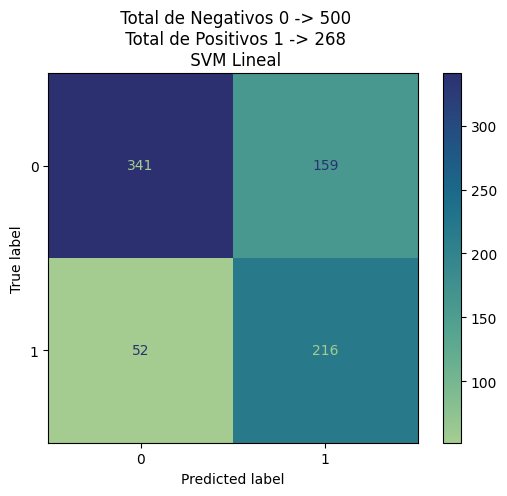

In [27]:
# Matriz de confusión
matriz_SVM=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_SVM))
matriz_SVM.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 SVM Lineal""")
plt.show()

De la matriz de confusión para SVM "lineal" tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 341 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 159 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 52 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 216 pacientes que eran diabéticos. 

## <span style="color:blue"> Utilizando un Kernel (Datos no linealmente separables)

Ya que obtuvimos las métricas y la matriz de confusión para el mejor modelo SVM que pudimos calibrar, debemos analizar que sucede en caso de que los datos no sean linealmente separables por un hiperplano.

En este caso se debe emplear un "Kernel" el cual lleva los datos a una dimensión mayor para lograr la separación por medio del hiperplano, algunos de los más utilizados son:
 - linear: Se usa en datos linealmente separables.

 - poly: El kernel polinómico se utiliza cuando los datos no son separables linealmente mediante una función polinómica.
 
 - rbf: El kernel radial utiliza una función gaussiana sobre los datos.
 
 - sigmoid: El kernel sigmoide utiliza una función del mismo nombre sobre los datos.

 Haciendo uso de estos Kernels vemos el valor de la sensibilidad promedio al utilizar una validación cruzada:

In [28]:
# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline:
kernels=["poly","rbf","sigmoid"]

for i in kernels:
    pipe_k=make_pipeline(KNNImputer(n_neighbors=4),StandardScaler(),SVC(C=1e-06,kernel=i,class_weight="balanced"))

    # Clasificamos el desempeño del modelo de a cuerdo a la sensibilidad:
    cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)
    scores=cross_val_score(pipe_k,X,Y,scoring="recall",cv=cv,n_jobs=-1)
    print(f"Sensibilidad promedio con un Kernel {i}: {scores.mean():.4f} +- {scores.std():.4f}")

Sensibilidad promedio con un Kernel poly: 0.4600 +- 0.4984
Sensibilidad promedio con un Kernel rbf: 0.4940 +- 0.4949
Sensibilidad promedio con un Kernel sigmoid: 0.4870 +- 0.4910


Como podemos ver el Kernel "rbf" o gaussiano es el que obtiene la mejor métrica de desempeño, entonces agregamos el hiperparámetro gamma, el cual es utilizado mayormente en un kernel rbf, ya que este controla la forma de la función gaussiana que se le aplica a los datos y vemos el comportamiento en la métrica de desempeño:

In [29]:
# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline:

pipe_gamma=make_pipeline(KNNImputer(n_neighbors=4),StandardScaler(),SVC(C=1e-06,kernel="rbf",gamma=1,class_weight="balanced"))

# Clasificamos el desempeño del modelo de a cuerdo a la sensibilidad
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)
scores=cross_val_score(pipe_gamma,X,Y,scoring="recall",cv=cv,n_jobs=-1)
print(f"Sensibilidad promedio: {scores.mean():.4f} +- {scores.std():.4f}")

Sensibilidad promedio: 0.4990 +- 0.4990


Como podemos ver, el hiperparámetro gamma si logró una mejora en el valor de la métrica de desempeño, por lo tanto si lo calibramos mediante una búsqueda por rejilla podemos mejorar el desempeño del modelo, teniendo en cuenta que al agregar este nuevo parámetro también tenemos que volver a calibrar los otros dos, ya que estos pueden tener valores distintos para lograr un mejor desempeño del modelo:

In [30]:
# Calibramos el modelo
espacio_param_rbf={"knnimputer__n_neighbors":np.arange(1,10),
               "svc__C":[0.000001,0.000001,0.00001,0.0001,0.001,0.01,0.1],
               "svc__gamma":[0.0001,0.001,0.01,0.1,0.15,0.2,0.3]}

# Rejilla de busqueda
rejilla_rbf=GridSearchCV(pipe_gamma,param_grid=espacio_param_rbf,scoring="recall",cv=cv,n_jobs=-1)
rejilla_rbf.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {rejilla_rbf.best_params_}")
print(f"Mejor valor de las métricas: {rejilla_rbf.best_score_}")

Mejor calibración de los hiperparámetros: {'knnimputer__n_neighbors': 2, 'svc__C': 0.1, 'svc__gamma': 0.3}
Mejor valor de las métricas: 0.8874536201783861


Al calibrar el modelo con gamma vemos que la sensibilidad llega al 88%, ahora veamos el comportamiento del modelo con estos hiperparámetros al emplear todos los datos:

In [31]:
# Aplicar el preprocesamiento de los datos, porque están incompletos
# Definimos la estrategia para completar los datos faltantes y estandarizar los datos (ya completos):
Pipe_SVM_rbf_g=make_pipeline(KNNImputer(n_neighbors=2),StandardScaler())

# Aplicamos las estrategias
X_std_SVM_rbf_g=Pipe_SVM_rbf_g.fit_transform(X)

# Definimos y entrenamos el modelo
Modelo_SVM_rbf_g=SVC(C=0.1,kernel="rbf",gamma=0.3, class_weight="balanced")
Modelo_SVM_rbf_g.fit(X_std_SVM_rbf_g,Y)

# Hacemos las predicciones (En el conjunto de prueba) y graficamos la matriz de confusión:
Y_pred_SVM_rbf_g=Modelo_SVM_rbf_g.predict(X_std_SVM_rbf_g)

# Reporte de clasificación:
print(classification_report(Y,Y_pred_SVM_rbf_g))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72       500
           1       0.54      0.90      0.68       268

    accuracy                           0.70       768
   macro avg       0.73      0.75      0.70       768
weighted avg       0.79      0.70      0.71       768



A partir del reporte de clasificación cuando usamos un kernel Gaussiano tenemos lo siguiente:

- <span style="color:green"> accuracy: El modelo predice correctamente al 70% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 54%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 92%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 90%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 59%.  


Ya que tenemos las predicciones de las clasificaciones y los valores de las métricas, podemos crear la matriz de confusión:

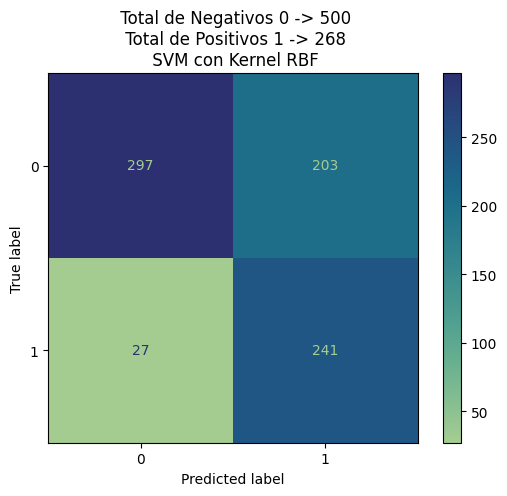

In [32]:
# Matriz de confusión
Matriz_SVM_rbf=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_SVM_rbf_g))
Matriz_SVM_rbf.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 SVM con Kernel RBF""")
plt.show()

De la matriz de confusión para SVM con Kernel Gaussiano tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 297 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 203 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 27 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 241 pacientes que eran diabéticos. 

Como se puede ver, al agregar un kernel gaussiano al modelo aumenta la sensibilidad, es decir, logra clasificar correctamente a más verdaderos positivos y reduce la especificidad (verdaderos negativos), además ester modelo tiene una ventaja, reduce los falsos negativos y aumenta los falsos positivos, esto es conveniente cuando se trata de diagnósticos, ya que es preferible que el modelo clasifique como diabético a alguien que no tiene diabetes, ya que con otra prueba se puede confinar que no tiene nada, mientras que cuando el modelo clasifica como no diabético a alguien que en realidad si es diabético es difícil que vuelva a realizarse una prueba.

<hr style="color:blue">

# <center> <span style="color:blue"> Árbol de Clasificación

<hr span style="color:blue">

Un árbol de clasificación, como su nombre lo indica, clasifica los datos en distintas categorías donde cada nodo representa un atributo del conjunto de datos y las ramas que salen de los nodos representan los posibles valores de la característica. El árbol comienza con un nodo principal dividiendo los datos según los valores de ese atributo, creando más nodos para cada posible valor y de nuevo se dividen los datos en subconjuntos que contienen datos con ese valor del atributo. De esta manera, el árbol se construye de manera recursiva hasta que la división de los subconjuntos llega a las hojas del árbol, es decir, este alcanza cierta profundidad o hasta llegar a un criterio de paro, por lo tanto, debemos tener en cuenta los parámetros del árbol al momento de calibrar el modelo, ya que el objetivo es encontrar la mejor división que maximice la ganancia de información, reduciendo así la impureza.

Por lo tanto debemos tomar en cuenta algunos parámetros del modelo:

- max_depth: La profundidad máxima del árbol, indica cuantas divisiones puede tener el árbol, este parámetro es importante ya que si no se establece una profundidad máxima, el modelo tiende a sobreajustar los datos de entrenamiento, y de manera inversa, si la profundidad es muy pequeña el modelo tiende a subajustar los datos.

- min_samples_leaf: Establece el número mínimo de muestras que debe haber en una hoja o nodo terminal del árbol.

- criterion: Establece el criterio que se utiliza para decidir como dividir los datos en los distintos nodos del árbol a partir de la ganancia de información y la reducción de la impureza, por default toma el valor de gini, pero también puede ser entropy.

Con estos parámetros podemos ver el desempeño de un árbol de clasificación utilizando los criterios gini y entropy, a través de una validación cruzada para distintas métricas:

In [33]:
criterios=["gini","entropy"]
for i in criterios:
    # Definimos la sentencia de pasos para entrenar el modelo a través de un pipeline:
    Pipe_1=make_pipeline(KNNImputer(n_neighbors=10),StandardScaler(),DecisionTreeClassifier(criterion=i,class_weight="balanced"))

    # Definimos el esquema de validación cruzada, el cuál calcula 50 métricas de desempeño:
    cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)

    # Clasificamos el desempeño del modelo de a cuerdo a las métricas
    print(f"Utilizando el criterio {i}\n")
    scores=cross_val_score(Pipe_1,X,Y,scoring="accuracy",cv=cv,n_jobs=-1)
    print(f"La exactitud promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

    scores=cross_val_score(Pipe_1,X,Y,scoring="precision",cv=cv,n_jobs=-1)
    print(f"La precisión promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

    scores=cross_val_score(Pipe_1,X,Y,scoring="recall",cv=cv,n_jobs=-1)
    print(f"La sensibilidad promedio: {scores.mean():.4f} +- {scores.std():.4f}")

    scores=cross_val_score(Pipe_1,X,Y,scoring="f1",cv=cv,n_jobs=-1)
    print(f"El F1-score promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

    scores=cross_val_score(Pipe_1,X,Y,scoring="roc_auc",cv=cv,n_jobs=-1)
    print(f"El área bajo la curva ROC promedio es: {scores.mean():.4f} +- {scores.std():.4f}")
    print("\n")

Utilizando el criterio gini

La exactitud promedio es: 0.6880 +- 0.0517
La precisión promedio es: 0.5569 +- 0.0944
La sensibilidad promedio: 0.5639 +- 0.0876
El F1-score promedio es: 0.5551 +- 0.0819
El área bajo la curva ROC promedio es: 0.6632 +- 0.0546


Utilizando el criterio entropy

La exactitud promedio es: 0.6997 +- 0.0482
La precisión promedio es: 0.5672 +- 0.0969
La sensibilidad promedio: 0.5709 +- 0.0978
El F1-score promedio es: 0.5576 +- 0.0843
El área bajo la curva ROC promedio es: 0.6687 +- 0.0611




Como podemos ver en los valores de las métricas, se obtiene un mejor desempeño en la exactitud y la sensibilidad al utilizar un criterio de entropy.

Ahora, utilizando este criterio y además añadiendo otros parámetros para la poda del árbol (evitar el sobreajuste) se realiza una calibración por medio de una rejilla de búsqueda:

In [34]:
# Vamos a calibrar el modelo, definiendo los pasos para entrenar el modelo a través de un pipeline
Pipe_Arbl=make_pipeline(KNNImputer(),StandardScaler(),DecisionTreeClassifier(criterion="entropy",class_weight="balanced"))

# Espacio de parámetros
Param_Arbol={"knnimputer__n_neighbors":np.arange(1,10),
               "decisiontreeclassifier__min_samples_leaf":np.arange(1,20,2),
               "decisiontreeclassifier__max_depth":np.arange(1,20,2)}

# Rejilla de busqueda
Rejilla_Arbol=GridSearchCV(Pipe_Arbl,param_grid=Param_Arbol,scoring="recall",cv=cv,n_jobs=-1)
Rejilla_Arbol.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_Arbol.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_Arbol.best_score_}")

Mejor calibración de los hiperparámetros: {'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 17, 'knnimputer__n_neighbors': 9}
Mejor valor de las métricas: 0.8661071574302341


Con estos valores de los hiperparámetros calibrados podemos entrenar un modelo con todos los datos:

In [35]:
# Aplicar el preprocesamiento de los datos, porque están incompletos:
# Definimos la estrategia para completar los datos faltantes y estandarizar los datos (ya completos):
Pipe_Arbl_C=make_pipeline(KNNImputer(n_neighbors=9),StandardScaler())

# Aplicamos las estrategias
X_std_Arbl=Pipe_Arbl_C.fit_transform(X)

# Definimos y entrenamos el modelo
Modelo_Arbl=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=17,max_depth=3,class_weight="balanced")
Modelo_Arbl.fit(X_std_Arbl,Y)

# Hacemos las predicciones:
Y_pred_Arbl=Modelo_Arbl.predict(X_std_Arbl)

# Reporte de clasificación:
print(classification_report(Y,Y_pred_Arbl))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       500
           1       0.58      0.89      0.70       268

    accuracy                           0.74       768
   macro avg       0.75      0.77      0.73       768
weighted avg       0.80      0.74      0.74       768



A partir del reporte de clasificación tenemos lo siguiente:

- <span style="color:green"> accuracy: El modelo predice correctamente al 74% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 58%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 92%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 89%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 65%.  


Ya que tenemos las predicciones de las clasificaciones y los valores de las métricas, podemos crear la matriz de confusión:

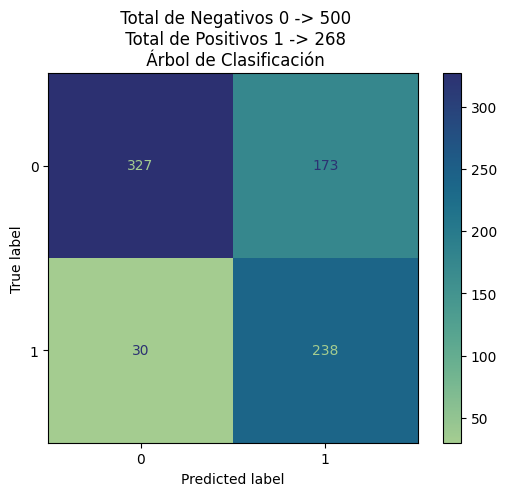

In [36]:
# Matriz de confusión
Matriz_Arbl=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_Arbl))
Matriz_Arbl.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 Árbol de Clasificación""")
plt.show()

De la matriz de confusión para un árbol de clasificación tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 327 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 173 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 30 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 238 pacientes que eran diabéticos. 

Podemos notar que en comparación con un modelo de SVM con kernel gaussiano, este modelo de árbol logra una mejor clasificación en los verdaderos negativos, y para los verdaderos positivos solo aumenta un poco, además también hay un aumento considerable en los falsos positivos. Por lo tanto, podríamos decir que el modelo de árbol clasifica mejor los datos de entrenamiento en comparación a los modelos anteriores.

<hr style="color:blue">

# <center> <span style="color:blue"> Bosques Aleatorios

<hr style="color:blue">

Los bosques aleatorios utilizan conjuntos de árboles de decisión o regresión para mejorar la precisión del modelo, cada árbol se construye utilizando un subconjunto aleatorio de los datos de entrenamiento y un subconjunto aleatorio de los atributos, es decir, no le damos a cada árbol los mismos datos ni los mismos atributos, así, se logra reducir el sobreajuste además de que el modelo generaliza de una mejor manera los datos nuevos. Para esto, cada uno de los árboles que genera el modelo genera una clasificación para los datos con los que entrenó, y la clasificación final se toma al realizar una "mayoría de votos" de las clasificaciones de todos los árboles, por lo tanto, la característica con mayor numero de aparición en el bosque es la seleccionada.

Comenzamos analizando un bosque con 100 árboles a partir del cuál obtendremos las distintas métricas de desempeño para clasificación por medio de una validación cruzada:

In [37]:
# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline, utilizando los atributos del modelo anterior:
Pipe_2=make_pipeline(KNNImputer(n_neighbors=10),StandardScaler(),
                   RandomForestClassifier(n_estimators=100,criterion="entropy",class_weight="balanced"))

# Definimos el esquema de validación cruzada, el cuál calcula 50 métricas de desempeño:
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)

# Clasificamos el desempeño del modelo de a cuerdo a las métricas:
scores=cross_val_score(Pipe_2,X,Y,scoring="accuracy",cv=cv,n_jobs=-1)
print(f"La exactitud promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_2,X,Y,scoring="precision",cv=cv,n_jobs=-1)
print(f"La precisión promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_2,X,Y,scoring="recall",cv=cv,n_jobs=-1)
print(f"La sensibilidad promedio: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_2,X,Y,scoring="f1",cv=cv,n_jobs=-1)
print(f"El F1-score promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_2,X,Y,scoring="roc_auc",cv=cv,n_jobs=-1)
print(f"El área bajo la curva ROC promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

La exactitud promedio es: 0.7568 +- 0.0431
La precisión promedio es: 0.6720 +- 0.0963
La sensibilidad promedio: 0.5916 +- 0.0931
El F1-score promedio es: 0.6189 +- 0.0842
El área bajo la curva ROC promedio es: 0.8273 +- 0.0434


Si comparamos los resultados con los valores de un solo árbol de clasificación:

- La exactitud promedio es: 0.6971 +- 0.0471
- La precisión promedio es: 0.5620 +- 0.0916
- La sensibilidad promedio: 0.5709 +- 0.1030
- El F1-score promedio es: 0.5693 +- 0.0854
- El área bajo la curva ROC promedio es: 0.6661 +- 0.0575

Podemos ver claramente como para un bosque con 100 árboles, las métricas de desempeño promedio son mejores, solo en la sensibilidad es dónde se el valor se mantiene estable.

Ahora, calibramos los hiperparámetros del modelo, teniendo en cuenta que para un árbol, la cantidad de valores en el espacio de parámetros hace que el tiempo de cómputo aumente considerablemente, por lo tanto, para un bosque aleatorio también se espera un aumento en el tiempo de procesamiento, por lo que el número de árboles se dejará en 100:

In [38]:
# Calibración del modelo:
espacio_param_bosque={"knnimputer__n_neighbors":np.arange(1,15,2),
               "randomforestclassifier__max_depth":np.arange(1,10),
               "randomforestclassifier__min_samples_leaf":np.arange(5,20,2)} 

# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline, utilizando los atributos del modelo anterior:
Pipe_3=make_pipeline(KNNImputer(),StandardScaler(),
                   RandomForestClassifier(n_estimators=100,criterion="entropy",class_weight="balanced"))

# Rejilla de búsqueda:
Rejilla_bosque=GridSearchCV(Pipe_3,param_grid=espacio_param_bosque,scoring="recall",cv=cv,n_jobs=-1)
Rejilla_bosque.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_bosque.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_bosque.best_score_}")

Mejor calibración de los hiperparámetros: {'knnimputer__n_neighbors': 7, 'randomforestclassifier__max_depth': 3, 'randomforestclassifier__min_samples_leaf': 7}
Mejor valor de las métricas: 0.8274029527819148


Vemos que el mejor valor de las métricas es menor que para un solo árbol, esto es debido a los rangos de valores que toman los parámetros al realizarse la calibración de estos mediante la rejilla, por lo tanto el modelo puede llegar a un valor de métrica aún mejor si se aumenta el rango de calibración, e incluso puede calibrarse el número de árboles en el bosque.
NOTA: Esto puede llevar demasiado tiempo de computo.

Ahora que ya tenemos la mejor configuración de los hiperparámetros, podemos entrenar el modelo con todos los datos y ver su comportamiento:

In [39]:
# Definimos la estrategia para completar los datos faltantes y estandarizar los datos:
Pipe_Bosque=make_pipeline(KNNImputer(n_neighbors=7),StandardScaler())

# Aplicamos la estrategia:
X_std_Bosque=Pipe_Bosque.fit_transform(X)

# Definimos el modelo y lo entrenamos:
Modelo_Bosque=RandomForestClassifier(n_estimators=100,criterion="entropy",min_samples_leaf=7,max_depth=2,class_weight="balanced")
Modelo_Bosque.fit(X_std_Bosque,Y)

# Realizamos las predicciones:
Y_pred_Bosque=Modelo_Bosque.predict(X_std_Bosque)

# Ya con las predicciones, imprimimos el reporte de clasificación:
print(classification_report(Y,Y_pred_Bosque))

              precision    recall  f1-score   support

           0       0.92      0.69      0.78       500
           1       0.60      0.88      0.72       268

    accuracy                           0.76       768
   macro avg       0.76      0.79      0.75       768
weighted avg       0.81      0.76      0.76       768



A partir del reporte de clasificación tenemos lo siguiente:

- <span style="color:green"> accuracy: El modelo predice correctamente al 76% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 61%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 91%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 87%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 70%.  


Ya que tenemos las predicciones de las clasificaciones y los valores de las métricas, podemos crear la matriz de confusión:

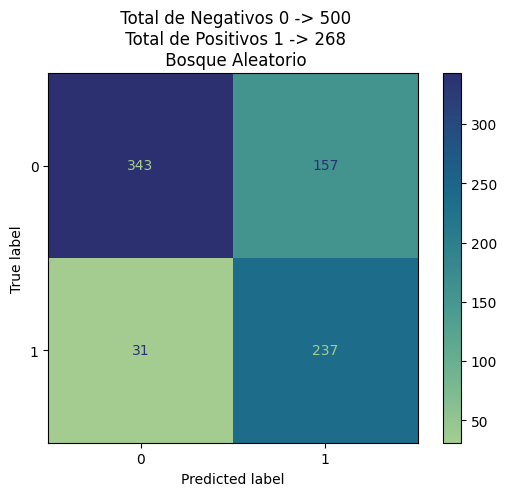

In [40]:
# Graficamos la matriz de confusión
Matriz_Bosque=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_Bosque))
Matriz_Bosque.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 Bosque Aleatorio""")
plt.show()

De la matriz de confusión para un bosque aleatorio de clasificación tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 350 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 150 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 36 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 232 pacientes que eran diabéticos. 

Podemos notar que en comparación con un modelo de un árbol de clasificación el bosque aleatorio clasifica de mejor manera a los verdaderos negativos (recall negativo), mientras que muestra una leve disminución en la precisión para los verdaderos positivos (recall positivo), también muestra una disminución en la clasificación de falsos positivos y un aumento en los falsos negativos.

Esta clasificación del modelo puede mejorarse con una afinación en la búsqueda de la mejor configuración de los hiperparámetros.

<hr style="color:blue">

# <center><span style="color:blue"> Naive Bayes

<hr style="color:blue">

Este modelo de clasificación se basa en el teorema de Bayes de la probabilidad condicional, de manera que el calculo de las probabilidades para determinar la característica es más simple. Debido a esto, el modelo se vuelve simple pero efectivo cuando las condiciones se cumplen..

Entrenamos el modelo a través de una validación cruzada para ver su comportamiento con distintas métricas de desempeño:

In [41]:
# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline:
Pipe_4=make_pipeline(KNNImputer(n_neighbors=10),StandardScaler(),GaussianNB())

# Definimos el esquema de validación cruzada:
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)

# Clasificamos el desempeño del modelo de a cuerdo a las métricas:
scores=cross_val_score(Pipe_4,X,Y,scoring="accuracy",cv=cv,n_jobs=-1)
print(f"La exactitud promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_4,X,Y,scoring="precision",cv=cv,n_jobs=-1)
print(f"La precisión promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_4,X,Y,scoring="recall",cv=cv,n_jobs=-1)
print(f"La sensibilidad promedio: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_4,X,Y,scoring="f1",cv=cv,n_jobs=-1)
print(f"El F1-score promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_4,X,Y,scoring="roc_auc",cv=cv,n_jobs=-1)
print(f"El área bajo la curva ROC promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

La exactitud promedio es: 0.7501 +- 0.0481
La precisión promedio es: 0.6457 +- 0.1003
La sensibilidad promedio: 0.6181 +- 0.0888
El F1-score promedio es: 0.6284 +- 0.0838
El área bajo la curva ROC promedio es: 0.8214 +- 0.0450


Ahora realizamos una búsqueda por rejilla del parámetro de numero de vecinos que se encarga de imputar los datos faltantes, para ver el desempeño del modelo: 

In [42]:
# Calibración del modelo:
espacio_param_naive={"knnimputer__n_neighbors":np.arange(1,20)} 

# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline, utilizando los atributos del modelo anterior:
Pipe_5=make_pipeline(KNNImputer(),StandardScaler(),GaussianNB())

# Rejilla de búsqueda:
Rejilla_Naive=GridSearchCV(Pipe_5,param_grid=espacio_param_naive,scoring="recall",cv=cv,n_jobs=-1)
Rejilla_Naive.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_Naive.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_Naive.best_score_}")

Mejor calibración de los hiperparámetros: {'knnimputer__n_neighbors': 6}
Mejor valor de las métricas: 0.6217197370641983


Vemos que la mejore métrica de la sensibilidad es ligeramente más alta que la de una validación cruzada, ahora, con el número de vecinos calibrado, entrenamos el modelo con todos los datos y hacemos las predicciones.

In [43]:
# Definimos la estrategia para completar los datos faltantes y estandarizar los datos:
Pipe_Naive=make_pipeline(KNNImputer(n_neighbors=6),StandardScaler())

# Aplicamos la estrategia:
X_std_Naive=Pipe_Naive.fit_transform(X)

# Definimos el modelo y lo entrenamos:
Modelo_Naive=GaussianNB()
Modelo_Naive.fit(X_std_Naive,Y)

# Realizamos las predicciones:
Y_pred_Naive=Modelo_Naive.predict(X_std_Naive)

# Ya con las predicciones, imprimimos el reporte de clasificación:
print(classification_report(Y,Y_pred_Naive))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       500
           1       0.65      0.62      0.64       268

    accuracy                           0.75       768
   macro avg       0.73      0.72      0.72       768
weighted avg       0.75      0.75      0.75       768



A partir del reporte de clasificación tenemos lo siguiente:

- <span style="color:green"> accuracy: El modelo predice correctamente al 75% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 65%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 80%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 62%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 82%.  


Ya que tenemos las predicciones de las clasificaciones y los valores de las métricas, podemos crear la matriz de confusión:

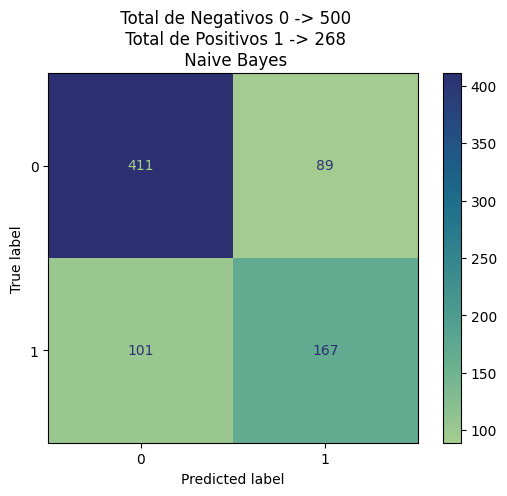

In [44]:
# Graficamos la matriz de confusión
Matriz_Naive=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_Naive))
Matriz_Naive.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 Naive Bayes""")
plt.show()

De la matriz de confusión para el modelo de Naive Bayes tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 411 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 89 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 101 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 167 pacientes que eran diabéticos.

 Podemos ver que para los verdaderos negativos el modelo los logra clasificar de mejor manera, pero disminuye bastante la clasificación correcta de los verdaderos positivos. De igual manera, el modelo disminuye la clasificación de los falsos positivos y aumenta la cantidad de falsos negativos, lo cual puede llevar a un grave problema, por lo tanto, este modelo no logra un buen desempeño como los anteriores.  

<hr style="color:blue">

# <center><span style="color:blue">XGBoosting

<hr style="color:blue">

El XGBoost (Extreme Gradient Boosting) es una técnica de ensamble que va construyendo modelos de manera secuencial, es decir, cada modelo busca corregir los errores del modelo anterior, esta técnica de ensamble es mucho más util en modelos débiles, tales como los árboles de regresión o clasificación. Por lo tanto, el modelo combina múltiples modelos de árboles de regresión para minimizar la función de perdida y crear así un modelo de predicción más fuerte y preciso.

Algunos de los hiperparámetros que podemos utilizar con el modelo son:
 - n_estimators: Nos indica el número de árboles de decisión que ajustará el modelo.

 - objective: Indica la función de pérdida que se utiliza para la optimización del modelo. Para este problema de clasificación binaria se elige la función de pérdida logística.

 - scale_pos_weight: Es utilizado cuando los datos de la variable de respuesta están desbalanceados, por lo tanto, este parámetro puede ajustarse para dar un mayor peso a los datos de la clase minoritaria.

 - learning_rate: Indica la tasa o ratio de aprendizaje que se utiliza en cada iteración del modelo, de manera que, para valores altos se tiene una convergencia rápida pero también puede llevar al sobreajuste, y valores bajos llevan a una convergencia lenta (más tiempo de procesamiento) pero ayuda a evitar el sobreajuste.

 - subsample: Indica la fracción de registros que se usaran al azar del conjunto de datos de entrenamiento en cada iteración.

 - colsample_bytree: Indica la fracción de atributos que se utilizaran al azar para cada iteración.

A Partir de estos parámetros del modelo calculamos las métricas de desempeño promedio a través de una validación cruzada:

In [45]:
# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline:
Pipe_6=make_pipeline(KNNImputer(n_neighbors=10),StandardScaler(),
                   XGBClassifier(n_estimators=100,objective="binary:logistic",scale_pos_weight=1.89))

# Definimos el esquema de validación cruzada que calcula 50 métricas de desempeño:
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)

# Clasificamos el desempeño del modelo de a cuerdo a las métricas de desempeño:
scores=cross_val_score(Pipe_6,X,Y,scoring="accuracy",cv=cv,n_jobs=-1)
print(f"La exactitud promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_6,X,Y,scoring="precision",cv=cv,n_jobs=-1)
print(f"La precisión promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_6,X,Y,scoring="recall",cv=cv,n_jobs=-1)
print(f"La sensibilidad promedio: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_6,X,Y,scoring="f1",cv=cv,n_jobs=-1)
print(f"El F1-score promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_6,X,Y,scoring="roc_auc",cv=cv,n_jobs=-1)
print(f"El área bajo la curva ROC promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

La exactitud promedio es: 0.7315 +- 0.0431
La precisión promedio es: 0.6094 +- 0.0961
La sensibilidad promedio: 0.6287 +- 0.0912
El F1-score promedio es: 0.6151 +- 0.0801
El área bajo la curva ROC promedio es: 0.7988 +- 0.0441


Ahora realizamos una búsqueda por rejilla para poder obtener la mejor configuración de los hiperparámetros que ajustan al modelo, teniendo en cuenta que al agregar más hiperparámetros aumenta considerablemente el tiempo de búsqueda, por lo tanto se hace la calibración a través de una búsqueda por rejilla aleatoria. Esta búsqueda se realiza aleatoriamente en un subconjunto de los posibles valores de los hiperparámetros evaluando el desempeño del modelo a través de la métrica definida, este proceso se repite un número especifico de veces hasta encontrar la mejor configuración de hiperparámetros del modelo.

Podemos mejorar la métrica de desempeño al aumentar el numero de combinaciones aleatorias de hiperparámetros (n_iter). Nota: También aumenta el tiempo de procesamiento

In [46]:
# Vamos a calibrar el modelo a través de la búsqueda por rejilla aleatoria:
espacio_param_XGB={"knnimputer__n_neighbors":np.arange(1,20),
               "xgbclassifier__learning_rate":[0.000001,0.00001,0.0001,0.001,0.01,0.1,0.15,0.2,0.3,0.4,0.5],
               "xgbclassifier__subsample":[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
               "xgbclassifier__colsample_bytree":[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
               "xgbclassifier__max_depth":np.arange(1,20)} 
# Definimos la secuencia de pasos para el modelo mediante un pipeline:
Pipe_7=make_pipeline(KNNImputer(),StandardScaler(),
                   XGBClassifier(n_estimators=500,objective="binary:logistic",scale_pos_weight=1.89))

# Rejilla de busqueda
Rejilla_Aleat=RandomizedSearchCV(Pipe_7,n_iter=100,param_distributions=espacio_param_XGB,scoring="recall",cv=cv,n_jobs=-1)
Rejilla_Aleat.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_Aleat.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_Aleat.best_score_}")

Mejor calibración de los hiperparámetros: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 1e-06, 'xgbclassifier__colsample_bytree': 0.5, 'knnimputer__n_neighbors': 13}
Mejor valor de las métricas: 0.8069816344182564


Al utilizar la calibración por medio de una rejilla aleatoria, el tiempo de calculo se reduce considerablemente, y además se pueden obtener un desempeño del modelo más acertado.

Ya que tenemos la mejor configuración de hiperparámetros y la mejor sensibilidad de estos, ahora procedemos a entrenar el modelo con estos valores y con todos los datos para ver las clasificaciones que logra:

In [47]:
# Aplicar el preprocesamiento de los datos, porque están incompletos
# Definimos la estrategia para completar los datos faltantes y estandarizar los datos:
Pipe_XGB_aleat=make_pipeline(KNNImputer(n_neighbors=8),StandardScaler())

# Aplicamos las estrategias
X_std_XGB=Pipe_XGB_aleat.fit_transform(X)

# Definimos y entrenamos el modelo
Modelo_XGB=XGBClassifier(n_estimators=500,subsample=0.7,max_depth=3,learning_rate=1e-05,colsample_bytree=0.7,
                        objective="binary:logistic",scale_pos_weight=1.89)
Modelo_XGB.fit(X_std_XGB,Y)

# Hacemos las predicciones:
Y_pred_XGB=Modelo_XGB.predict(X_std_XGB)

# Imprimimos el reporte de clasificación:
print(classification_report(Y,Y_pred_XGB))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       500
           1       0.63      0.87      0.73       268

    accuracy                           0.78       768
   macro avg       0.77      0.80      0.77       768
weighted avg       0.82      0.78      0.78       768



A partir del reporte de clasificación tenemos lo siguiente:

- <span style="color:green"> accuracy: El modelo predice correctamente al 78% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 63%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 91%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 87%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 73%.  


Ya que tenemos las predicciones de las clasificaciones y los valores de las métricas, podemos crear la matriz de confusión:

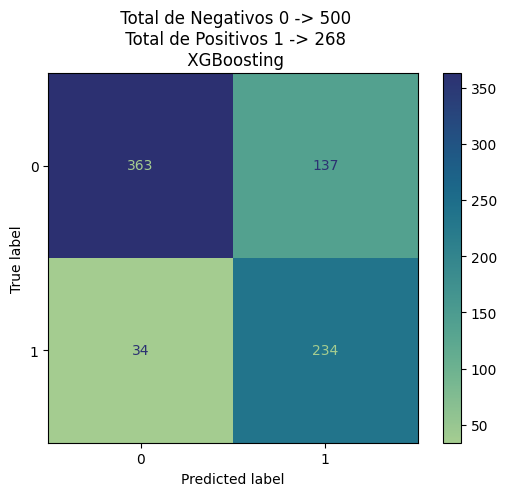

In [48]:
# Matriz de confusión:
Matriz_XGB=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_XGB))
Matriz_XGB.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 XGBoosting""")
plt.show()

De la matriz de confusión para XGBoosting tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 363 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 137 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 34 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 234 pacientes que eran diabéticos.

 Podemos ver que logra una clasificación algo más acertada que el modelo de bosques aleatorios, siendo estos dos modelos los que mejor clasifican los datos, pero con la gran diferencia que el modelo de XGBoosting utilizó un total de 100 árboles y muchos más posibles valores de hiperparámetros para la calibración que el modelo de bosques aleatorios, y además este modelo tomo una menor cantidad de tiempo de procesamiento.
 Por lo tanto es mucho mejor la búsqueda por rejilla aleatoria.

<hr style="color:blue">

# <center><span style="color:blue">K-Vecinos

<hr style="color:blue">

Este algoritmo se utiliza para predecir la clase de un objeto a partir de las clases de las observaciones más cercanas a este. Para esto, se seleccionan los k-vecinos más cercanos en función de una métrica de distancia y del peso de cada vecino dependiendo de su clase, para así lograr una clasificación del nuevo objeto u observación por medio de una mayoría de votos.

Algunos de los hiperparámetros del modelo son:
 - n_neighbors: El número de vecinos a considerar

 - metrics: Es la métrica de distancia a utilizar, algunas son "euclidean", "manhattan", "minkowski", el valor por defecto es la distancia euclideana.

 - p: Este parámetro se utiliza como la potencia de la métrica de minkowski, es decir, el valor predeterminado de p es 2, lo que significa que se utiliza la distancia euclideana (minkowski con p=2), si p=1 se utiliza la distancia de manhattan (minkowski con p=1).

 - weights: Indica la ponderación de los pesos de las clases de los vecinos, puede tomar los valores "uniform" o "distance" para una ponderación uniforme o inversamente proporcional a la distancia.

 Primero entrenaremos un modelo de K-vecinos con pesos uniformes a través de una validación cruzada, utilizando como técnica de imputación de datos SimpleImputer():

In [49]:
# Definimos la sentencia de pasos para entrenar el modelo mediante un pipeline:
Pipe_8=make_pipeline(SimpleImputer(strategy="median"),StandardScaler(),KNeighborsClassifier(n_neighbors=7))

# Definimos el esquema de validación cruzada que calcula 50 métricas de desempeño:
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=1234)

# Clasificamos el desempeño del modelo de a cuerdo a las métricas de desempeño:
scores=cross_val_score(Pipe_8,X,Y,scoring="accuracy",cv=cv,n_jobs=-1)
print(f"La exactitud promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_8,X,Y,scoring="precision",cv=cv,n_jobs=-1)
print(f"La precisión promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_8,X,Y,scoring="recall",cv=cv,n_jobs=-1)
print(f"La sensibilidad promedio: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_8,X,Y,scoring="f1",cv=cv,n_jobs=-1)
print(f"El F1-score promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

scores=cross_val_score(Pipe_8,X,Y,scoring="roc_auc",cv=cv,n_jobs=-1)
print(f"El área bajo la curva ROC promedio es: {scores.mean():.4f} +- {scores.std():.4f}")

La exactitud promedio es: 0.7477 +- 0.0428
La precisión promedio es: 0.6485 +- 0.0941
La sensibilidad promedio: 0.6037 +- 0.0908
El F1-score promedio es: 0.6204 +- 0.0750
El área bajo la curva ROC promedio es: 0.8032 +- 0.0387


Ahora calibramos el número de vecinos mediante una búsqueda por rejilla, es decir, buscamos la mejor configuración de hiperparámetros:

In [50]:
# Vamos a calibrar el modelo a través de la búsqueda por rejilla:
espacio_param_Knn={"kneighborsclassifier__n_neighbors":np.arange(1,20)} 

# Definimos la secuencia de pasos para el modelo mediante un pipeline:
Pipe_9=make_pipeline(SimpleImputer(strategy="median"),StandardScaler(),KNeighborsClassifier())

# Rejilla de busqueda
Rejilla_Knn=GridSearchCV(Pipe_9,param_grid=espacio_param_Knn,scoring="recall",cv=cv,n_jobs=-1)
Rejilla_Knn.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_Knn.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_Knn.best_score_}")

Mejor calibración de los hiperparámetros: {'kneighborsclassifier__n_neighbors': 11}
Mejor valor de las métricas: 0.6092162140761732


YA que tenemos la mejor configuración del número de vecinos, podemos entrenar el modelo con todos los datos y ver el comportamiento:

In [51]:
# Aplicar el preprocesamiento de los datos, porque están incompletos
# Definimos la estrategia para completar los datos faltantes y estandarizar los datos:
Pipe_KNN=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

# Aplicamos las estrategias
X_std_KNN=Pipe_KNN.fit_transform(X)

# Definimos y entrenamos el modelo
Modelo_KNN=KNeighborsClassifier(n_neighbors=11)
Modelo_KNN.fit(X_std_KNN,Y)

# Hacemos las predicciones:
Y_pred_KNN=Modelo_KNN.predict(X_std_KNN)

# Imprimimos el reporte de clasificación:
print(classification_report(Y,Y_pred_KNN))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       500
           1       0.73      0.66      0.70       268

    accuracy                           0.80       768
   macro avg       0.78      0.77      0.77       768
weighted avg       0.80      0.80      0.80       768



A partir del reporte de clasificación tenemos lo siguiente:

- <span style="color:green"> accuracy: El modelo predice correctamente al 80% de los datos.
 
- <span style="color:green"> precision (Positivos): Cuando el modelo predice que una persona es diabética, la probabilidad de que realmente sea diabética es del 73%.
 
- <span style="color:green"> precision (negativos): Cuando mi modelo predice una persona no diabética, la probabilidad de que realmente no sea diabética el del 83%.
 
- <span style="color:green"> recall (positivos): De las pacientes que si son diabeticas, el modelo identifica correctamente al 66%.
 
- <span style="color:green"> recall (negativo): De las pacientes que no son diabeticas, el modelo logra identificar correctamente al 87%.  


Ya que tenemos las predicciones de las clasificaciones y los valores de las métricas, podemos crear la matriz de confusión:

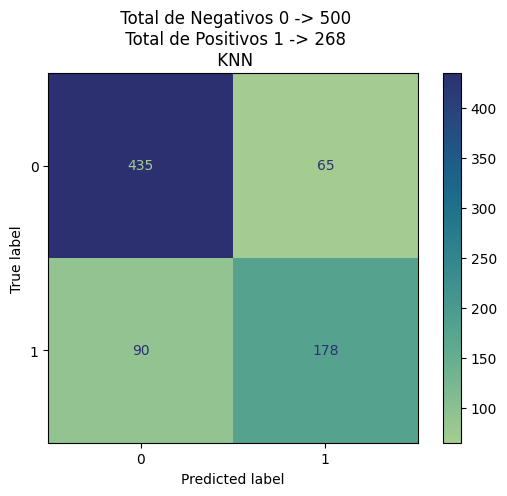

In [52]:
# Matriz de confusión:
Matriz_KNN=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_KNN))
Matriz_KNN.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 KNN""")
plt.show()

De la matriz de confusión para K-Vecinos tenemos lo siguiente:
 - <span style="color:green"> Verdaderos negativos: El modelo clasificó correctamente a 435 pacientes que no eran diabéticos.

 - <span style="color:green"> Falsos positivos: El modelo clasificó incorrectamente a 65 pacientes como diabéticos cuando en realidad no eran diabéticos.

 - <span style="color:green"> Falsos negativos: El modelo clasificó incorrectamente a 90 pacientes como no diabéticos cuando en realidad si eran diabéticos.
 
 - <span style="color:green"> Verdaderos positivos: El modelo clasificó correctamente a 178 pacientes que eran diabéticos.

 Podemos ver que el modelo simple de k vecinos logra mejorar considerablemente el número de verdaderos negativos, pero para las demás clasificaciones lo hace de una peor manera que los modelos anteriores, por lo tanto se hará un modelo de k vecinos ponderados para ver si las clasificaciones finales de la matriz de confusión, así como las métricas pueden mejorarse. 

## <span style="color:blue">K-Vecinos Ponderados

Para este modelo solo tenemos que agregar los hiperparámetros que no se consideraron en el modelo anterior, es decir, los pesos y la métrica de la distancia. Para la métrica de la distancia se utilizará el valor de p, ya que en este podemos englobar de mejor manera a "euclidean", "manhattan" y las demás potencias de la métrica de minkowski.

Por lo tanto podemos calibrar directamente los hiperparámetros por medio de una búsqueda de rejilla:

In [53]:
# Vamos a calibrar el modelo a través de la búsqueda por rejilla:
espacio_param_Knn_Pond={"kneighborsclassifier__n_neighbors":np.arange(1,20),
                   "kneighborsclassifier__weights":["uniform","distance"],
                   "kneighborsclassifier__p":np.arange(1,20)}

# Definimos la secuencia de pasos para el modelo mediante un pipeline:
Pipe_10=make_pipeline(SimpleImputer(strategy="median"),StandardScaler(),KNeighborsClassifier())

# Rejilla de busqueda
Rejilla_Knn_Pond=GridSearchCV(Pipe_10,param_grid=espacio_param_Knn_Pond,scoring="accuracy",cv=cv,n_jobs=-1)
Rejilla_Knn_Pond.fit(X,Y)

# Imprimimos los resultados
print(f"Mejor calibración de los hiperparámetros: {Rejilla_Knn_Pond.best_params_}")
print(f"Mejor valor de las métricas: {Rejilla_Knn_Pond.best_score_}")

Mejor calibración de los hiperparámetros: {'kneighborsclassifier__n_neighbors': 16, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}
Mejor valor de las métricas: 0.7661859193438141


Con estos hiperparámetros entrenamos el modelo usando todos los datos y viendo su comparación con el modelo anterior:

In [54]:
# Aplicar el preprocesamiento de los datos, porque están incompletos
# Definimos la estrategia para completar los datos faltantes y estandarizar los datos:
Pipe_KNN_Pond=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

# Aplicamos las estrategias
X_std_KNN_Pond=Pipe_KNN_Pond.fit_transform(X)

# Definimos y entrenamos el modelo
Modelo_KNN_Pond=KNeighborsClassifier(n_neighbors=16,weights="distance",p=2)
Modelo_KNN_Pond.fit(X_std_KNN_Pond,Y)

# Hacemos las predicciones:
Y_pred_KNN_Pond=Modelo_KNN_Pond.predict(X_std_KNN_Pond)

# Imprimimos el reporte de clasificación:
print(classification_report(Y,Y_pred_KNN_Pond))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



Podemos ver directamente que el modelo ajusta de una manera perfecta a los datos de entrenamiento, por lo tanto podemos decir que tuvo un sobreajuste. Por lo tanto, para evitar esto se puede optar por reducir el modelo, es decir, elegir un conjunto de atributos mas pequeño para calibrar el modelo.

Ahora si vemos la matriz de confusión: 

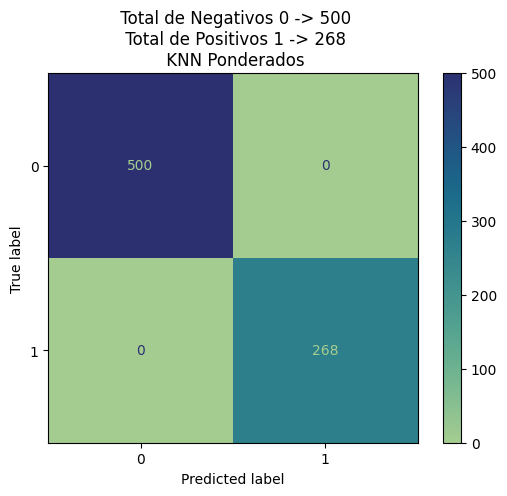

In [55]:
# Matriz de confusión:
Matriz_KNN_Pond=ConfusionMatrixDisplay(confusion_matrix(Y,Y_pred_KNN_Pond))
Matriz_KNN_Pond.plot(cmap="crest")
plt.title(""" Total de Negativos 0 -> 500
 Total de Positivos 1 -> 268
 KNN Ponderados""")
plt.show()

Vemos claramente que la clasificación es perfecta, y así confirmamos que el modelo se sobreajustó a los datos de entrenamiento, esto es debido a que al entrenar con todos los datos se obtienen métricas de desempeño muy optimistas.

Aún podemos usar este modelo, solamente que no debemos realizar las predicciones sobre los datos que usamos anteriormente, de lo contrario, el modelo volverá una vez más a realizar un sobreajuste de los datos de entrenamiento, lo que podemos hacer, es cargar una nueva base de datos la cual el modelo no haya visto para poder realizar las predicciones sobre esta, de manera que probemos verdaderamente su desempeño predictivo.

Para hacer esto se seguiría el siguiente proceso:
 - Cargar una nueva base de datos 

 - Entrenamos el modelo con los todos los datos, sin hacer predicciones sobre los mismos datos de entrenamiento.

 - Ya que tenemos el modelo entrenado, podemos realizar las predicciones sobre la base de datos nueva.

In [59]:
# Vamos a relizar predicciones en una paciente nueva.  ## Nota: Los datos deben ser del mismo tipo al igual que la base original
# En este caso creamos una base con un registro, ya que no contamos con una base completa.
paciente_nueva=pd.DataFrame()
paciente_nueva["Pregnancies"]=[3]
paciente_nueva["Glucose"]=114.0
paciente_nueva["BloodPressure"]=130.0
paciente_nueva["SkinThickness"]=28.0
paciente_nueva["Insulin"]=np.NaN
paciente_nueva["BMI"]=29.2
paciente_nueva["DiabetesPedigreeFunction"]=0.73
paciente_nueva["Age"]=37
paciente_nueva

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,114.0,130.0,28.0,NaN,29.2,0.73,37


In [57]:
# Con los valores de los hiperparámetros obtenidos calibramos nuestro modelo final:
modelo_final=KNeighborsClassifier(n_neighbors=1,weights="distance",p=2)

# Previo a entrenar el modelo final, es necesario preprocesar los datos, transformandolos palicando las técnicas de imputación
Pipe_nuevos=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())      # Técnicas de imputación y escalamiento

# Entrenamos las estrategias
Pipe_nuevos.fit(X) # Aprende las estrategias

# Aplicamos las estrategias en los datos
X_std_nuevos=pd.DataFrame(Pipe_nuevos.transform(X),columns=X.columns)

# Una vez que tenemos los datos en la escala que necesitamos, entonces ya entrenamos el modelo
modelo_final.fit(X_std_nuevos,Y)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [60]:
# Realizamos las predicciones:
# Completamos los datos faltantes de la base de datos nueva y aplicamos el reescalamiento, a partir de la estrategia entrenada.
paciente_nueva_2=pd.DataFrame(Pipe_nuevos.transform(paciente_nueva),columns=paciente_nueva.columns)   # Para que el dataframe muestre los datos originales creamos una variable nueva, utilizando el dataframe 
                                                                                                # estandarizado e imputado
# Predicciones
paciente_nueva["Outcome"]=modelo_final.predict(paciente_nueva_2)
paciente_nueva

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,114.0,130.0,28.0,NaN,29.2,0.73,37,0
